In [1]:
import pandas as pd
import requests

In [2]:
df = pd.read_csv('/Users/lukewalker/Downloads/archive/champions_league/playerStats_2024_UEFA.CHAMPIONS.csv')
players = pd.read_csv('/Users/lukewalker/Downloads/archive/champions_league/players.csv')

/var/folders/00/tszrqkcj2jq4vf_4t2qvrr7h0000gn/T/ipykernel_82391/2662656021.py:2: DtypeWarning: Columns (2,7) have mixed types. Specify dtype option on import or set low_memory=False.
  players = pd.read_csv('/Users/lukewalker/Downloads/archive/champions_league/players.csv')


In [17]:
goalkeepers_valuations = pd.read_csv('/Users/lukewalker/code/Wukelalks/player_performance_model/Player_Valuation_CSVs/goalkeeper_valuations.csv')
defenders_valuations = pd.read_csv('/Users/lukewalker/code/Wukelalks/player_performance_model/Player_Valuation_CSVs/defender_valuations.csv')
midfielders_valuations = pd.read_csv('/Users/lukewalker/code/Wukelalks/player_performance_model/Player_Valuation_CSVs/midfielder_valuations.csv')
forwards_valuations = pd.read_csv('/Users/lukewalker/code/Wukelalks/player_performance_model/Player_Valuation_CSVs/attacker_valuations.csv')

In [18]:
# Combine all datasets by stacking them
all_player_valuations = pd.concat(
    [goalkeepers_valuations, defenders_valuations, midfielders_valuations, forwards_valuations],
    ignore_index=True  # Resets the index after concatenation for the final DataFrame
)

In [19]:
# Rename the column 'name' to 'player_name'
all_player_valuations.rename(columns={'Name': 'fullName'}, inplace=True)

In [21]:
all_player_valuations.head()

,fullName,Position,Age,Market Value,Club Name
0,Gregor Kobel,Goalkeeper,27,€40.00m,Borussia Dortmund
1,David Raya,Goalkeeper,29,€40.00m,Arsenal FC
2,Gianluigi Donnarumma,Goalkeeper,25,€35.00m,Paris Saint-Germain
3,Mike Maignan,Goalkeeper,29,€35.00m,AC Milan
4,Ederson,Goalkeeper,31,€30.00m,Manchester City


In [22]:
import pandas as pd
from unidecode import unidecode

# Function to standardize player names and remove dashes
def standardize_names(df, name_column):
    df[name_column] = df[name_column].apply(
        lambda x: unidecode(str(x)).strip().lower().replace('-', '') if pd.notnull(x) else x
    )
    return df

# Apply standardization to both DataFrames ('player_name' column)
players = standardize_names(players, 'fullName')
all_player_valuations = standardize_names(all_player_valuations, 'fullName')

# Check the names after standardization (optional)
print(players['fullName'].head())
print(all_player_valuations['fullName'].head())

0           andre silva
1    soumaila coulibaly
2            juan cabal
3          scott carson
4         lamine camara
Name: fullName, dtype: object
0            gregor kobel
1              david raya
2    gianluigi donnarumma
3            mike maignan
4                 ederson
Name: fullName, dtype: object


In [5]:
print("\n".join(players.columns))

athleteId
firstName
middleName
lastName
fullName
displayName
shortName
nickName
slug
displayWeight
weight
displayHeight
height
age
dateOfBirth
gender
jersey
citizenship
birthPlaceCountry
positionName
positionId
positionAbbreviation
headshotUrl
headshot_alt
timestamp


In [6]:
columns_to_drop = [
    "firstName", "middleName", "lastName", "displayName", "shortName", "nickName", "slug",
    "displayWeight", "weight", "displayHeight", "height", "age", "dateOfBirth", "gender",
    "jersey", "citizenship", "birthPlaceCountry", "positionId", "positionAbbreviation",
    "headshotUrl", "headshot_alt", "timestamp"
]

# Step 3: Drop the specified columns
players = players.drop(columns=columns_to_drop)

In [9]:
players = pd.merge(players, df, how='inner', on='athleteId')

In [10]:
players.head()

,athleteId,fullName,positionName,seasonType,year,league,teamId,appearances_value,subIns_value,foulsCommitted_value,...,ownGoals_value,goalAssists_value,offsides_value,shotsOnTarget_value,totalShots_value,totalGoals_value,shotsFaced_value,saves_value,goalsConceded_value,timestamp
0,3368,André Silva,Forward,12885,2024,UEFA.CHAMPIONS,11420,4,3,1,...,0,0,0,0,1,0,0,0,1,2025-01-30 14:47:52
1,10767,Soumaila Coulibaly,Defender,12885,2024,UEFA.CHAMPIONS,6997,6,1,3,...,0,0,0,0,0,0,0,2,5,2025-01-30 14:47:48
2,24412,Juan Cabal,Defender,12885,2024,UEFA.CHAMPIONS,111,2,0,3,...,0,0,1,0,0,0,0,0,2,2025-01-30 14:47:51
3,37557,Scott Carson,Goalkeeper,12885,2024,UEFA.CHAMPIONS,382,0,0,0,...,0,0,0,0,0,0,0,0,0,2025-01-30 14:47:52
4,38721,Lamine Camara,Midfielder,12885,2024,UEFA.CHAMPIONS,174,8,0,10,...,0,0,2,0,5,0,0,0,9,2025-01-30 14:47:45


In [11]:
print("\n".join(players.columns))

athleteId
fullName
positionName
seasonType
year
league
teamId
appearances_value
subIns_value
foulsCommitted_value
foulsSuffered_value
yellowCards_value
redCards_value
ownGoals_value
goalAssists_value
offsides_value
shotsOnTarget_value
totalShots_value
totalGoals_value
shotsFaced_value
saves_value
goalsConceded_value
timestamp


In [12]:
columns_to_drop = [
    "seasonType", "year", "league", "timestamp", "subIns_value"
]

# Step 3: Drop the specified columns
players = players.drop(columns=columns_to_drop)

In [13]:
players.head()

,athleteId,fullName,positionName,teamId,appearances_value,subIns_value,foulsCommitted_value,foulsSuffered_value,yellowCards_value,redCards_value,ownGoals_value,goalAssists_value,offsides_value,shotsOnTarget_value,totalShots_value,totalGoals_value,shotsFaced_value,saves_value,goalsConceded_value
0,3368,André Silva,Forward,11420,4,3,1,1,0,0,0,0,0,0,1,0,0,0,1
1,10767,Soumaila Coulibaly,Defender,6997,6,1,3,5,0,0,0,0,0,0,0,0,0,2,5
2,24412,Juan Cabal,Defender,111,2,0,3,2,1,0,0,0,1,0,0,0,0,0,2
3,37557,Scott Carson,Goalkeeper,382,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,38721,Lamine Camara,Midfielder,174,8,0,10,19,2,0,0,0,2,0,5,0,0,0,9


In [25]:
# Merge all_players_df with all_player_valuations on the 'player_name' column
players_with_valuations = players.merge(all_player_valuations, on='fullName', how='left')

# Output the shape and a sample of the merged DataFrame
print("Merged DataFrame shape:", players_with_valuations.shape)

Merged DataFrame shape: (1071, 23)


In [26]:
players = players_with_valuations

In [27]:
players.head()

,athleteId,fullName,positionName,teamId,appearances_value,subIns_value,foulsCommitted_value,foulsSuffered_value,yellowCards_value,redCards_value,...,shotsOnTarget_value,totalShots_value,totalGoals_value,shotsFaced_value,saves_value,goalsConceded_value,Position,Age,Market Value,Club Name
0,3368,andre silva,Forward,11420,4,3,1,1,0,0,...,0,1,0,0,0,1,NaN,NaN,NaN,NaN
1,10767,soumaila coulibaly,Defender,6997,6,1,3,5,0,0,...,0,0,0,0,2,5,NaN,NaN,NaN,NaN
2,24412,juan cabal,Defender,111,2,0,3,2,1,0,...,0,0,0,0,0,2,Left-Back,24.0,€9.00m,Juventus FC
3,37557,scott carson,Goalkeeper,382,0,0,0,0,0,0,...,0,0,0,0,0,0,Goalkeeper,39.0,€200k,Manchester City
4,38721,lamine camara,Midfielder,174,8,0,10,19,2,0,...,0,5,0,0,0,9,Central Midfield,21.0,€20.00m,AS Monaco


In [28]:
players.isnull().sum()

athleteId                 0
fullName                  0
positionName              0
teamId                    0
appearances_value         0
subIns_value              0
foulsCommitted_value      0
foulsSuffered_value       0
yellowCards_value         0
redCards_value            0
ownGoals_value            0
goalAssists_value         0
offsides_value            0
shotsOnTarget_value       0
totalShots_value          0
totalGoals_value          0
shotsFaced_value          0
saves_value               0
goalsConceded_value       0
Position                277
Age                     277
Market Value            277
Club Name               277
dtype: int64

In [29]:
players.dropna(inplace=True)

In [36]:
players.head()

,athleteId,fullName,positionName,teamId,appearances_value,subIns_value,foulsCommitted_value,foulsSuffered_value,yellowCards_value,redCards_value,...,shotsOnTarget_value,totalShots_value,totalGoals_value,shotsFaced_value,saves_value,goalsConceded_value,Position,Age,Market Value,Club Name
2,24412,juan cabal,Defender,111,2,0,3,2,1,0,...,0,0,0,0,0,2,Left-Back,24.0,€9.00m,Juventus FC
3,37557,scott carson,Goalkeeper,382,0,0,0,0,0,0,...,0,0,0,0,0,0,Goalkeeper,39.0,€200k,Manchester City
4,38721,lamine camara,Midfielder,174,8,0,10,19,2,0,...,0,5,0,0,0,9,Central Midfield,21.0,€20.00m,AS Monaco
5,40200,kasper schmeichel,Goalkeeper,256,8,0,1,0,1,0,...,0,0,0,91,28,13,Goalkeeper,38.0,€750k,Celtic FC
6,70224,rodrigo riquelme,Midfielder,1068,5,4,2,0,0,0,...,1,3,0,0,0,2,Left Winger,24.0,€25.00m,Atlético de Madrid


In [38]:
def rep(s):
    s = s.replace('€', '')
    if 'm' in s:
        s = float(s.replace('m', '')) * 1000
    elif 'k' in s:
        s = float(s.replace('k', ''))
    return s

players['Market Value'].apply(rep)

2        9000.0
3         200.0
4       20000.0
5         750.0
6       25000.0
         ...   
1018     2000.0
1022      350.0
1032     2500.0
1045      500.0
1048      500.0
Name: Market Value, Length: 794, dtype: float64

In [39]:
# Remove symbols like '€', 'm', 'k' and convert to numerical values
players['Market Value'] = players['Market Value'].apply(rep)

# Ensure the target variable is numerical
print(players['Market Value'].head())

2     9000.0
3      200.0
4    20000.0
5      750.0
6    25000.0
Name: Market Value, dtype: float64


In [42]:
# Get unique field positions
field_positions = players['positionName'].unique()

# Create a dictionary to store DataFrames for each position dynamically
position_dfs = {}

for position in field_positions:
    # Filter and store each position's DataFrame
    position_dfs[position] = players[players['positionName'] == position]
    print(f"{position}: {len(position_dfs[position])} players extracted.")

# Access specific DataFrames, e.g.,
goalkeepers_df = position_dfs['Goalkeeper']
defenders_df = position_dfs['Defender']
midfielders_df = position_dfs['Midfielder']
forwards_df = position_dfs['Forward']

Defender: 264 players extracted.
Goalkeeper: 114 players extracted.
Midfielder: 255 players extracted.
Forward: 161 players extracted.


/var/folders/00/tszrqkcj2jq4vf_4t2qvrr7h0000gn/T/ipykernel_82391/1045742783.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = players.corr()


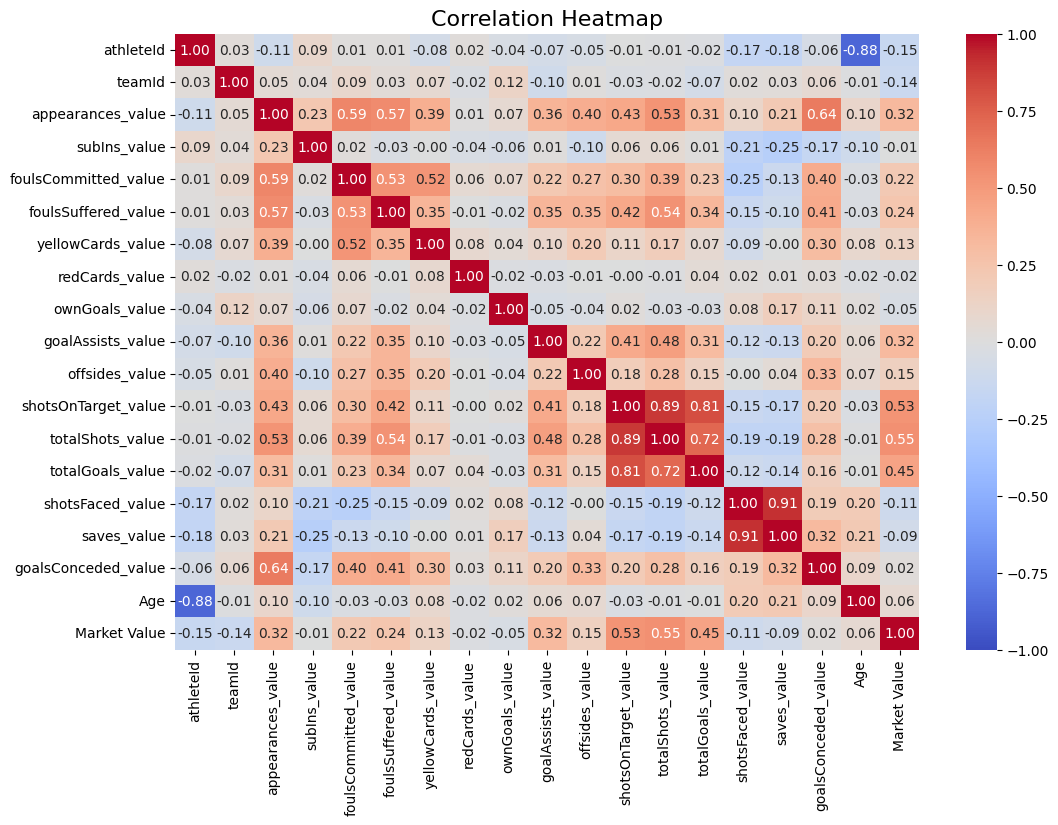

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = players.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)

# Set heatmap title
plt.title("Correlation Heatmap", fontsize=16)
plt.show()


In [43]:
print("\n".join(players.columns))

athleteId
fullName
positionName
teamId
appearances_value
subIns_value
foulsCommitted_value
foulsSuffered_value
yellowCards_value
redCards_value
ownGoals_value
goalAssists_value
offsides_value
shotsOnTarget_value
totalShots_value
totalGoals_value
shotsFaced_value
saves_value
goalsConceded_value
Position
Age
Market Value
Club Name


In [44]:
# Define the features (X) and target (y)
selected_features = ['appearances_value', 'goalAssists_value', 
                     'offsides_value', 'shotsOnTarget_value', 'totalShots_value', 'totalGoals_value']

X = forwards_df[selected_features]
y = forwards_df['Market Value']

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Set Shape: {X_train.shape}")
print(f"Test Set Shape: {X_test.shape}")

Training Set Shape: (128, 6)
Test Set Shape: (33, 6)


In [47]:
# Standardize the features (fit on training set, transform both training and test sets)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid (parameters to tune)
param_grid = {
    'n_estimators': [140, 160, 180, 200, 250],   # Test more estimators for stability
    'max_depth': [13, 14, 15],             # Allow deeper trees or unrestricted depth
    'min_samples_split': [5, 7, 10, 15],        # Stricter split criteria
    'min_samples_leaf': [2, 3, 4, 5, 6],            # Slightly higher minimum leaf sizes
    'max_features': ['sqrt']                     # Keep only 'sqrt' since it's the most stable
}

# Initialize the Random Forest Regressor
random_forest = RandomForestRegressor(random_state=42)

# Initialize the GridSearchCV
grid_search = GridSearchCV(
    estimator=random_forest,    # Model
    param_grid=param_grid,      # Hyperparameter grid
    scoring='neg_mean_squared_error',  # Evaluation metric (negated since GridSearch minimizes by default)
    cv=5,                       # Number of folds in cross-validation
    verbose=2,                  # Show progress while tuning
    n_jobs=-1                   # Parallel processing to speed up computation
)

# Fit GridSearchCV on the training data
grid_search.fit(X_train_scaled, y_train)

# Extract and print the best parameters and score
print("Best Parameters:", grid_search.best_params_)  # Optimal hyperparameter values
print("Best Score (Negative MSE):", grid_search.best_score_)  # Best cross-validated score

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=3, min_samples_split=15, n_estimators=200; total time=   0.4s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=140; total time=   0.3s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=140; total time=   0.3s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=160; total time=   0.3s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=180; total time=   0.4s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=200; total time=   0.4s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=140; total time=   0.3s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimato

[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=140; total time=   0.3s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=140; total time=   0.3s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=160; total time=   0.3s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=180; total time=   0.4s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=200; total time=   0.4s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=200; total time=   0.4s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=160; total time=   0.3s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=160; total time=   0.3s
[CV] END max_depth=16, max_features=sq

[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=3, min_samples_split=15, n_estimators=180; total time=   0.4s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=3, min_samples_split=15, n_estimators=200; total time=   0.4s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=140; total time=   0.3s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=160; total time=   0.3s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=180; total time=   0.4s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=180; total time=   0.4s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=200; total time=   0.4s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=140; total time=   0.3s
[CV] END max_depth=16, max_features=s

[CV] END max_depth=13, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=180; total time=   0.4s
[CV] END max_depth=13, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END max_depth=13, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=250; total time=   0.5s
[CV] END max_depth=13, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=140; total time=   0.3s
[CV] END max_depth=13, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=140; total time=   0.3s
[CV] END max_depth=13, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=160; total time=   0.3s
[CV] END max_depth=13, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=180; total time=   0.4s
[CV] END max_depth=13, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=200; total time=   0.5s
[CV] END max_depth=13, max_features=sqrt

[CV] END max_depth=13, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END max_depth=13, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=250; total time=   0.5s
[CV] END max_depth=13, max_features=sqrt, min_samples_leaf=3, min_samples_split=15, n_estimators=140; total time=   0.3s
[CV] END max_depth=13, max_features=sqrt, min_samples_leaf=3, min_samples_split=15, n_estimators=160; total time=   0.3s
[CV] END max_depth=13, max_features=sqrt, min_samples_leaf=3, min_samples_split=15, n_estimators=180; total time=   0.4s
[CV] END max_depth=13, max_features=sqrt, min_samples_leaf=3, min_samples_split=15, n_estimators=180; total time=   0.4s
[CV] END max_depth=13, max_features=sqrt, min_samples_leaf=3, min_samples_split=15, n_estimators=200; total time=   0.4s
[CV] END max_depth=13, max_features=sqrt, min_samples_leaf=3, min_samples_split=15, n_estimators=250; total time=   0.5s
[CV] END max_depth=13, max_featu

[CV] END max_depth=13, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END max_depth=13, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=250; total time=   0.5s
[CV] END max_depth=13, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=250; total time=   0.5s
[CV] END max_depth=13, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=160; total time=   0.4s
[CV] END max_depth=13, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=180; total time=   0.4s
[CV] END max_depth=13, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=180; total time=   0.5s
[CV] END max_depth=13, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=200; total time=   0.5s
[CV] END max_depth=13, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=250; total time=   0.6s
[CV] END max_depth=13, max_features=sqrt

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, precision_score

# Train the Random Forest with Best Parameters
best_random_forest = RandomForestRegressor(
    n_estimators=grid_search.best_params_['n_estimators'],
    max_depth=grid_search.best_params_['max_depth'],
    min_samples_split=grid_search.best_params_['min_samples_split'],
    min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
    max_features=grid_search.best_params_['max_features'],
    random_state=42
)

# Retrain the best model
best_random_forest.fit(X_train_scaled, y_train)

# Evaluate on the test set
y_pred_best_rf = best_random_forest.predict(X_test_scaled)
mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print(f"Optimized Random Forest MAE: {mae_best_rf:.2f}")
print(f"Optimized Random Forest R²: {r2_best_rf:.2f}")